<a href="https://colab.research.google.com/github/Aegis111/Jaideep-0393/blob/main/Music_Popularity_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Music Popularity Prediction Project

# 🎵 Music Popularity Prediction using Spotify Dataset 🎧

## 📁 Dataset: `Spotify_data.csv`

This project aims to **predict the popularity of music tracks** using machine learning regression models based on musical features and metadata.

---

##  Step-by-Step Workflow

### 🔹 Step 1: Load and Understand the Dataset
- Read the dataset using `pandas`
- Explore the shape, column names, and data types
- Identify the **target variable**: `Popularity`
- Inspect some sample rows

### 🔹 Step 2: Data Preprocessing
- Drop irrelevant columns:
  - `Unnamed: 0`, `Track Name`, `Artists`, `Album Name`, `Album ID`, `Track ID`, `Release Date`
- Convert boolean column `Explicit` to numerical (True → 1, False → 0)
- Check for and handle missing values
- Ensure all features are numeric

### 🔹 Step 3: Feature Selection
- Use correlation heatmap to observe relationship between features and popularity
- Optionally use `SelectKBest` or model-based feature importance

### 🔹 Step 4: Train-Test Split
- Split the dataset into training and test sets (e.g., 80% training, 20% testing)

### 🔹 Step 5: Model Training
Apply regression models like:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting (e.g., XGBoost)
- (Optional) Neural Network

### 🔹 Step 6: Model Evaluation
Evaluate using:
- R² Score
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- Visualize Actual vs Predicted Popularity

### 🔹 Step 7: Visualization
- Correlation heatmap
- Feature importance bar plot
- Residual plots
- Predicted vs Actual scatter plot

---

## Objective:
Build a robust regression model that can **accurately predict the popularity of a song** based on its musical attributes. This can help music labels, artists, and marketers make better decisions.



## Step 1 – Load and Explore the Dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Spotify_data.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()


,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [ ]:
df.tail()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
222,222,Tu Chahiye,"Pritam, Atif Aslam",Bajrangi Bhaijaan,4nZOPP0atfJbBlkedLYi7t,3aaiAWCet6sbfOfLSn3g7i,66,2015-07-07,272680,False,...,0.744,7,-5.817,1,0.0446,0.403,0.000000,0.0853,0.415,134.068
223,223,"Aabaad Barbaad (From ""Ludo"")","Pritam, Arijit Singh","Aabaad Barbaad (From ""Ludo"")",1PzsfgcbPbiW7uflc9Zi5Z,0hFUtSsV2itYEUTZGj6w5H,58,2020-10-21,309103,False,...,0.522,7,-5.857,1,0.0317,0.686,0.000000,0.4100,0.628,118.001
224,224,Jag Ghoomeya,"Vishal-Shekhar, Rahat Fateh Ali Khan, Irshad K...",Sultan,0tAi6H8acUKefYMIEuxcMA,4KCbZcshgibfJSCAkg87Lv,62,2016-05-31,281992,False,...,0.565,11,-7.954,1,0.0347,0.479,0.000002,0.1050,0.607,82.653
225,225,"Tumhe Kitna Pyaar Karte (From ""Bawaal"")","Mithoon, Arijit Singh, Manoj Muntashir","Tumhe Kitna Pyaar Karte (From ""Bawaal"")",20zQZcEhMLsDUn1LhPCEFY,03hJuEQpEQERrHpjcXKWzJ,65,2023-07-07,305232,False,...,0.374,10,-9.849,0,0.0328,0.924,0.000008,0.0840,0.388,101.855
226,226,Bekhayali,Sachet Tandon,Kabir Singh,3uuu6u13U0KeVQsZ3CZKK4,4yMbbysldl7E3WgiaugnwM,61,2019-06-14,371791,False,...,0.582,9,-5.180,0,0.0413,0.449,0.000000,0.3190,0.365,168.400


Dataset:

1. Target Variable: Popularity – This is what we want to predict.

2. Features: Include musical attributes such as:

   Danceability, Energy, Loudness, Tempo, Valence, etc.

3. Metadata: Like Track Name, Artists, Album Name, Release Date, etc.

There are 22 columns in total.

## Step 2: Preprocessing the Data

1. Drop non-numeric or irrelevant columns:

   Unnamed: 0, Track Name, Artists, Album Name, Album ID, Track ID, Release Date

2. Convert Explicit (True/False) to integers (1/0)

3. Ensure all remaining features are numeric

4. Separate features (X) and target (y = Popularity)

In [ ]:
columns_to_drop = [
    'Unnamed: 0', 'Track Name', 'Artists', 'Album Name',
    'Album ID', 'Track ID', 'Release Date'
]
df_clean = df.drop(columns=columns_to_drop)

Convert 'Explicit' boolean to int (1 or 0)

In [ ]:
df_clean['Explicit'] = df_clean['Explicit'].astype(int)


Separate features and target

In [ ]:
X = df_clean.drop(columns=['Popularity'])
y = df_clean['Popularity']

In [ ]:
X.dtypes.value_counts()

,count
float64,9
int64,4
object,1


In [ ]:
non_numeric_cols = X.select_dtypes(include='object').columns.tolist()
non_numeric_cols

['External URLs']

In [ ]:
X.select_dtypes(include='object').columns


Index(['External URLs'], dtype='object')

In [ ]:
X = X.drop(columns=['External URLs'])


## Step 3: Feature Selection (Correlation Matrix)

1. Compute the correlation between each feature and Popularity

2. Visualize it as a heatmap

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_corr = X.copy()
df_corr['Popularity'] = y

In [ ]:
corr_matrix = df_corr.corr()

In [ ]:
print(corr_matrix['Popularity'].sort_values(ascending=False))


Popularity          1.000000
Explicit            0.405406
Loudness            0.308110
Danceability        0.251928
Energy              0.250068
Speechiness         0.190621
Tempo               0.131820
Instrumentalness    0.104846
Liveness            0.066110
Mode               -0.008246
Key                -0.008550
Valence            -0.045580
Duration (ms)      -0.269510
Acousticness       -0.431117
Name: Popularity, dtype: float64


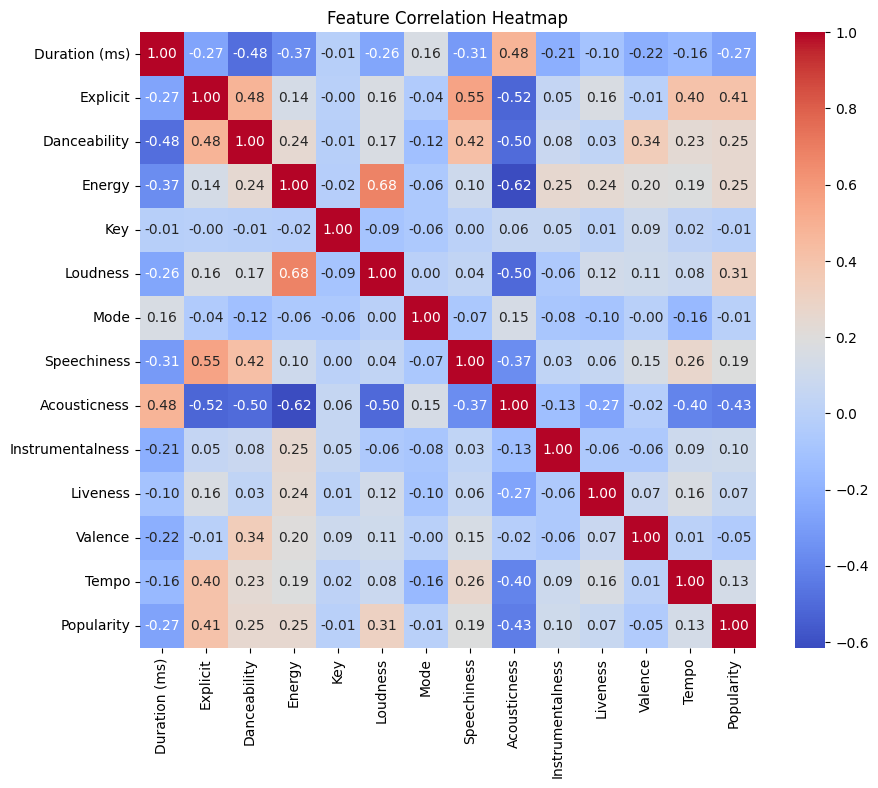

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 4: Train/Test Split

We’ll split the dataset into:

80% training set (for training the model)

20% test set (for evaluating performance)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5: Model Building

###Model 1: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)


###Model 2: Random Forest Regressor (More Powerful)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

## Step 6: Evaluation

We’ll evaluate both models using:

1. R² Score — how well the model explains variance (1 = perfect)

2. MAE (Mean Absolute Error)

3. RMSE (Root Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Linear Regression Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("🔹 Linear Regression:")
print(f"MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")

print("\n🔹 Random Forest Regressor:")
print(f"MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")


🔹 Linear Regression:
MAE: 6.40, RMSE: 8.12, R²: 0.01

🔹 Random Forest Regressor:
MAE: 5.35, RMSE: 6.70, R²: 0.33


Step 7: Visualization

1. Feature Importance Plot (for Random Forest)

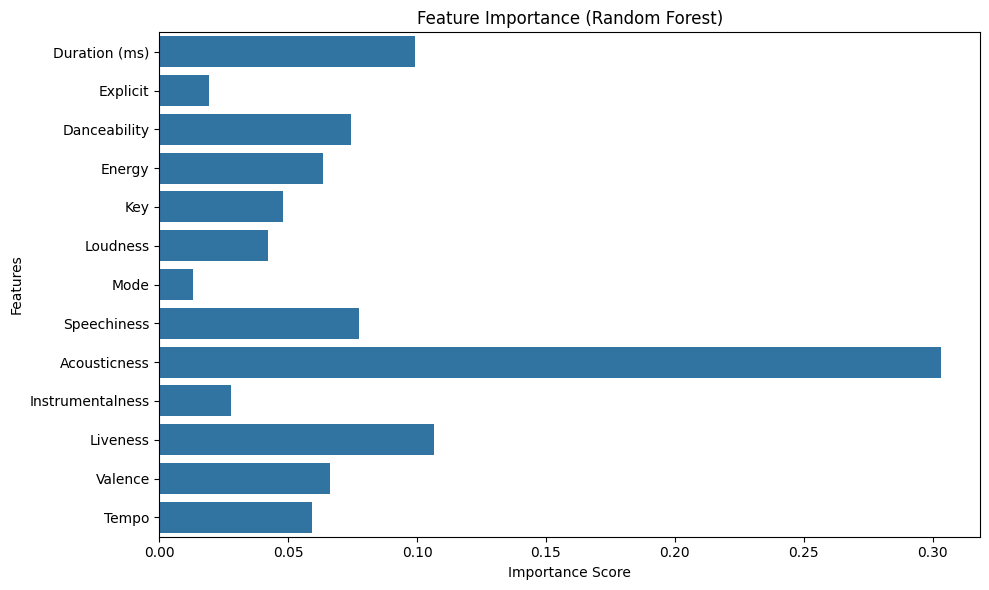

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
features = X.columns


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

2. Actual vs Predicted Popularity Plot

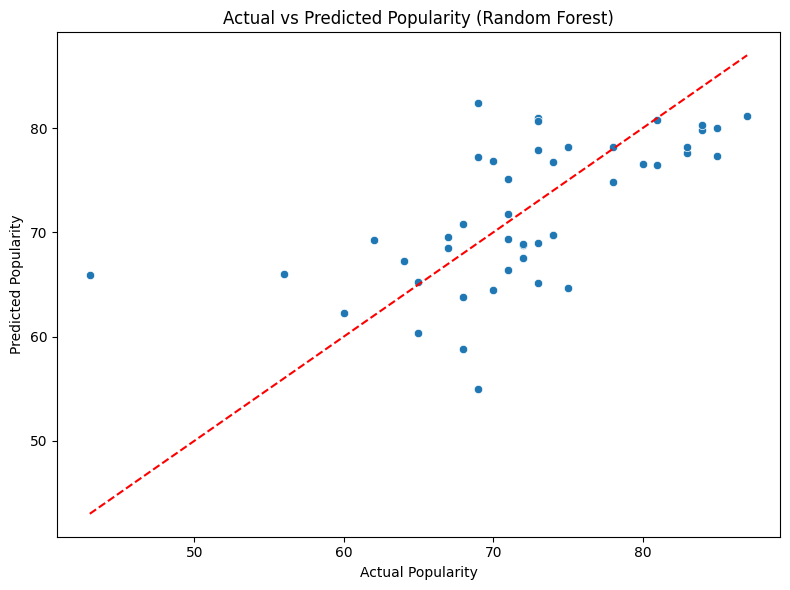

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity (Random Forest)")
plt.tight_layout()
plt.show()
